# Table of Content

1. [Problem Statement](#1.)
1. [Importing Libraries](#2.)
1. [Dataset Description](#3.)
 * [Null values in the target variable](#3.1)  
1. [Feature Selection](#4.)
1. [Data Pre-processing](#5.)
  * [Dropping null values in the target variable](#5.1)
  * [Scaling features](#5.2) 
1. [Model Building & Evaluation](#6.)
1. [Regression Tree](#7.)
1. [Things tried](#8.)

<a id="1."></a>
# Problem Statement

We need to predict the salaries of baseball players in 1987 using 1986th-year data.  
Target variable - Salary

<a id="2."></a>
# Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeRegressor

from sklearn import tree

<a id="3."></a>
# Dataset Description

In [2]:
df = pd.read_csv('/kaggle/input/hitters-baseball-data/Hitters.csv')

In [3]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [4]:
df.shape

(322, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [6]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


<a id="3.1"></a>
#### Null values in the target variable

In [7]:
#percentage of missing values in target variable
df['Salary'].isna().sum()/len(df) * 100

18.32298136645963

<a id="4."></a>
# Feature Selection

Selecting few features which I think is important for salary prediction since the goal of this notebook is to understand regression trees.

In [8]:
features = ['Years', 'Hits', 'Runs', 'RBI','Walks','PutOuts', 'Salary']

In [9]:
new_df = df[features]
new_df

,Years,Hits,Runs,RBI,Walks,PutOuts,Salary
0,1,66,30,29,14,446,NaN
1,14,81,24,38,39,632,475.0
2,3,130,66,72,76,880,480.0
3,11,141,65,78,37,200,500.0
4,2,87,39,42,30,805,91.5
...,...,...,...,...,...,...,...
317,5,127,65,48,37,325,700.0
318,12,136,76,50,94,313,875.0
319,6,126,61,43,52,37,385.0
320,8,144,85,60,78,1314,960.0


<a id="5."></a>
# Data Pre-processing

<a id="5.1"></a>
#### Dropping null values in the target variable

In [10]:
new_df.dropna(inplace = True)

/tmp/ipykernel_20/117842389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.dropna(inplace = True)


In [11]:
X = new_df.drop(['Salary'], axis = 1)
y = new_df['Salary']

<a id="5.2"></a>
#### Scaling features

In [12]:
scaler = StandardScaler()
X[['Years', 'Hits', 'Runs', 'RBI','Walks','PutOuts']] = scaler.fit_transform(X[['Years', 'Hits', 'Runs', 'RBI','Walks','PutOuts']])

<a id="6."></a>
# Model Building & Evaluation

In [13]:
max_score = 0
best_depth = 0
for depth in range(1, 21):
    dt_regressor = DecisionTreeRegressor(max_depth = depth)
    scores = cross_val_score(dt_regressor, X, y, cv = 5)
    mean_score = scores.mean()
    if max_score < mean_score:
        max_score = mean_score
        best_depth = depth
print('best r2 score ', max_score ,'is achieved with depth ', best_depth)
dt_regressor = DecisionTreeRegressor(max_depth = best_depth)
dt_regressor.fit(X, y)

best r2 score  0.3462279955113515 is achieved with depth  2


DecisionTreeRegressor(max_depth=2)

<a id="7."></a>
# Regression Tree

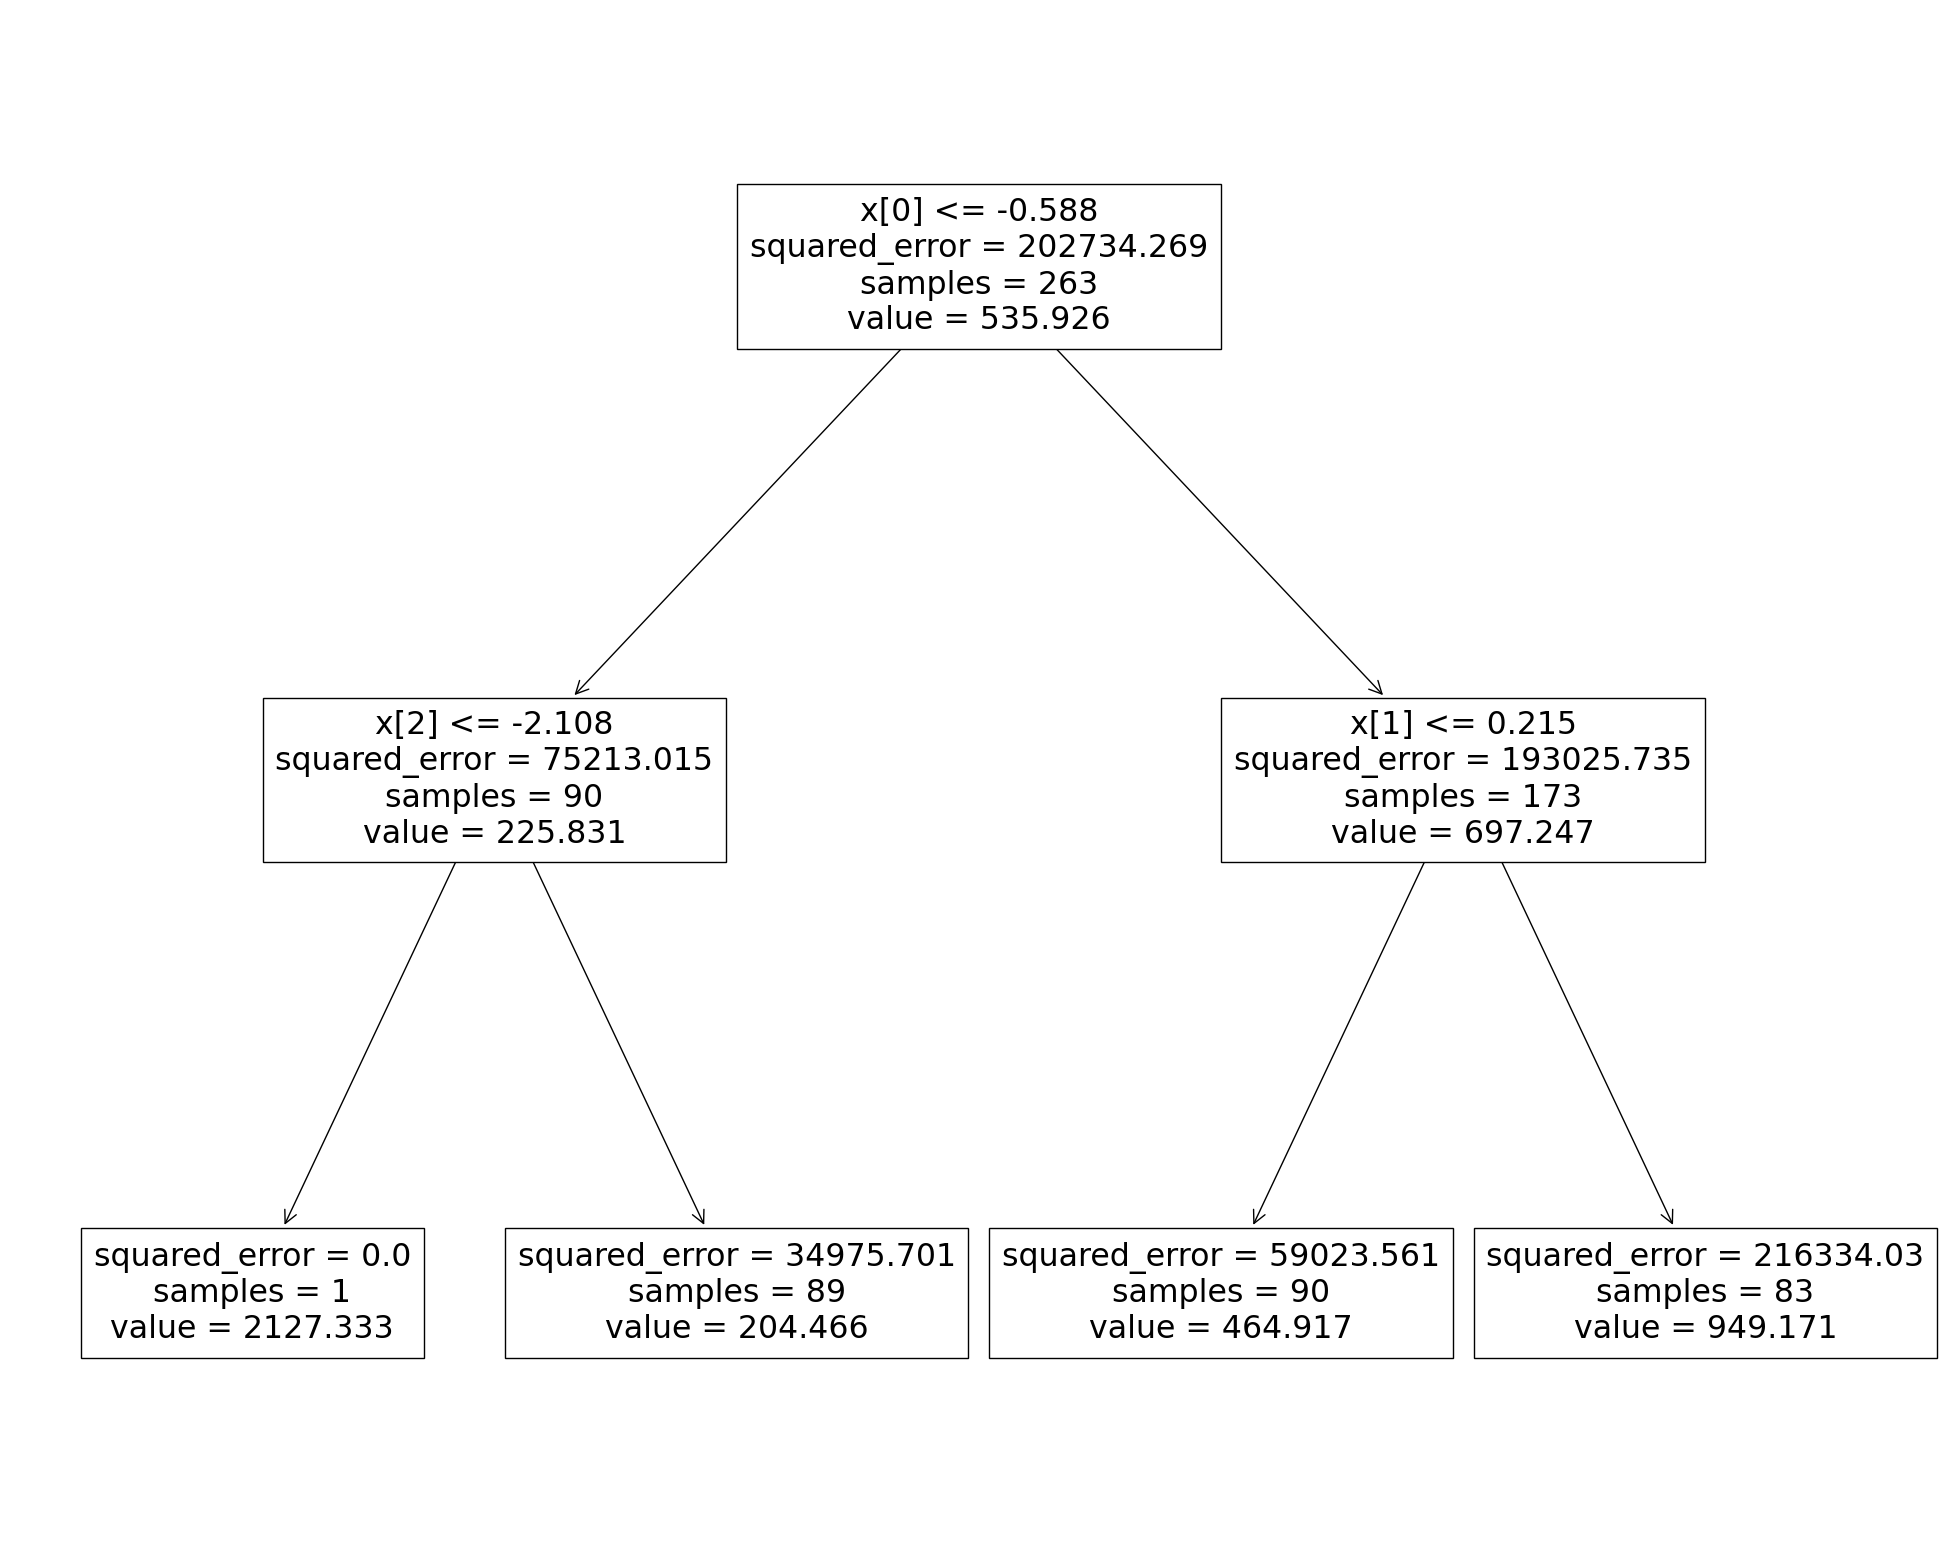

In [14]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dt_regressor)
plt.show()

<a id="8."></a>
# Things tried

cross validation, dropping null values in the target variable, no tree pruning = 0.1 (mean r2 score)  
cross validation, dropping null values in the target variable, tree pruning with max depth = 0.34 with depth 2  (**Method we finally choose)**   
cross validation, imputing values in the target variable, no tree pruning = -0.3   
cross validation, imputing values in the target variable, tree pruning with max depth = 0.3 with depth 3  